<a href="https://colab.research.google.com/github/Neeraja02/IPL-Data-Analysis/blob/main/IPL_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
ipl = pd.read_csv('C:\\Users/neeru/Downloads/matches.csv')

Text(0, 0.5, 'Number of player of the match award')

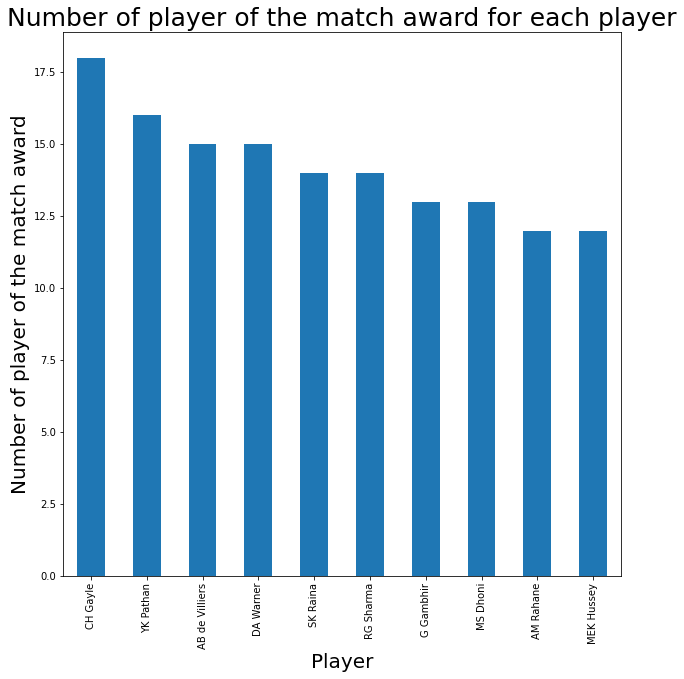

In [ ]:
#number of player of the match award for each player
fig, ax = plt.subplots(figsize=(10, 10))
ipl['player_of_match'].value_counts()[:10].plot(kind = 'bar') 
ax.set_title('Number of player of the match award for each player' , fontsize = 25)
ax.set_xlabel('Player' , fontsize = 20)
ax.set_ylabel('Number of player of the match award' , fontsize = 20)

In [ ]:
#does winning the toss affect win?

win_count = 0
for index, value in ipl.iterrows():
    if(value['toss_winner']==value['winner']):
        win_count += 1

print(f'The number of times the team winning toss has won: {win_count}')
prob = win_count/len(ipl)
print('The probability of winning if won the toss: {:.2f}' .format(prob))

The number of times the team winning toss has won: 325
The probability of winning if won the toss: 0.51


In [ ]:
#table of venues that hosted matches  

venues = ipl['venue'].value_counts()

venue_df = pd.DataFrame(columns=['venue', 'matches'])
for i in venues.iteritems():
    print(i)
    temp_df = pd.DataFrame({
        'venue':[i[0]],
        'matches':[i[1]]
    })
    venue_df = venue_df.append(temp_df, ignore_index=True)

('M Chinnaswamy Stadium', 66)
('Eden Gardens', 61)
('Feroz Shah Kotla', 60)
('Wankhede Stadium', 57)
('Rajiv Gandhi International Stadium, Uppal', 49)
('MA Chidambaram Stadium, Chepauk', 48)
('Punjab Cricket Association Stadium, Mohali', 35)
('Sawai Mansingh Stadium', 33)
('Dr DY Patil Sports Academy', 17)
('Subrata Roy Sahara Stadium', 17)
('Maharashtra Cricket Association Stadium', 15)
('Kingsmead', 15)
('SuperSport Park', 12)
('Sardar Patel Stadium, Motera', 12)
('Punjab Cricket Association IS Bindra Stadium, Mohali', 11)
('Brabourne Stadium', 11)
('Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium', 11)
('Saurashtra Cricket Association Stadium', 10)
('Himachal Pradesh Cricket Association Stadium', 9)
('New Wanderers Stadium', 8)
('Barabati Stadium', 7)
('JSCA International Stadium Complex', 7)
('Dubai International Cricket Stadium', 7)
('Newlands', 7)
('Sheikh Zayed Stadium', 7)
("St George's Park", 7)
('Shaheed Veer Narayan Singh International Stadium', 6)
('Sharjah Cricket Stad

<AxesSubplot:title={'center':'Team batting first and winning the match.'}, xlabel='Winner', ylabel='Win by runs'>

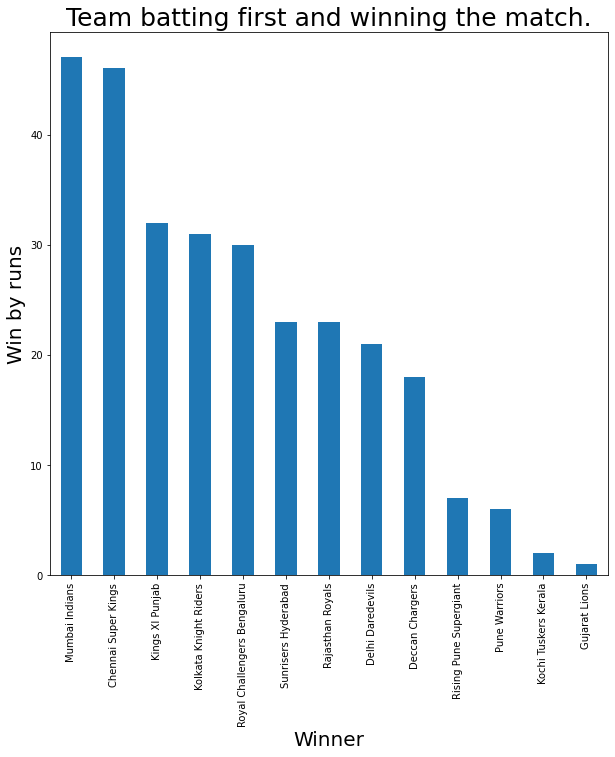

In [ ]:
#team batting first winners
fig, ax = plt.subplots(figsize=(10, 10))
ax.set_title('Team batting first and winning the match.' , fontsize = 25)
ax.set_xlabel('Winner' , fontsize = 20)
ax.set_ylabel('Win by runs' , fontsize = 20)
team_batting_first_won = ipl.loc[(ipl['win_by_runs']!=0), ['id', 'winner']]
team_batting_first_won_df = team_batting_first_won['winner'].value_counts()
team_batting_first_won_df.plot(kind = 'bar')

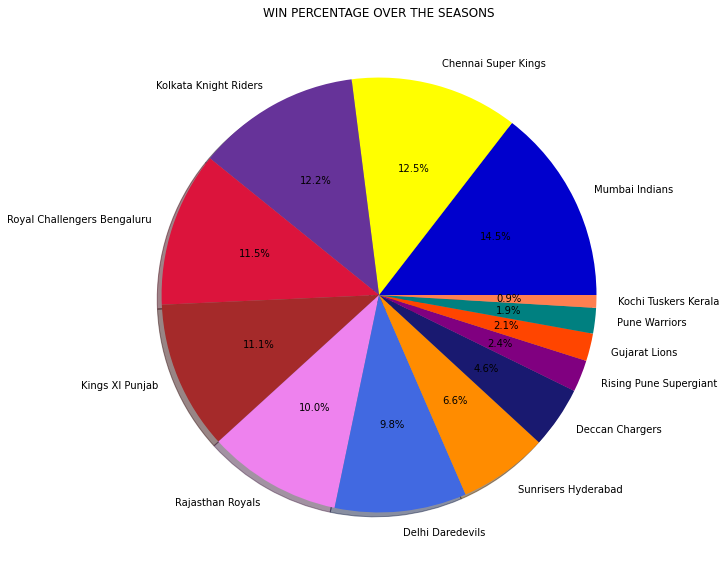

In [ ]:
#number of wins per team
plt.figure(figsize=(10,10))
colorsList=["mediumblue","yellow","rebeccapurple","crimson","brown","violet","royalblue","darkorange","midnightblue","purple","orangered","teal","coral"]
plt.pie(list(ipl['winner'].value_counts()),labels=list(ipl['winner'].value_counts().keys()),colors=colorsList,autopct='%0.1f%%',shadow=True)
plt.title(label="WIN PERCENTAGE OVER THE SEASONS",loc="center")
plt.show()

In [ ]:
#Most number of wins in each season
teams_per_season = ipl.groupby('season')['winner'].value_counts()
year = 2008
win_per_season = pd.DataFrame(columns=['year', 'team', 'wins'])
for a in teams_per_season.iteritems():    
    if a[0][0]==year:
        win = pd.DataFrame({'year': [a[0][0]],'team': [a[0][1]],'wins': [a[1]]})
        win_per_season = win_per_season.append(win)
        year += 1
win_per_season

,year,team,wins
0,2008,Rajasthan Royals,13
0,2009,Delhi Daredevils,10
0,2010,Mumbai Indians,11
0,2011,Chennai Super Kings,11
0,2012,Kolkata Knight Riders,12
0,2013,Mumbai Indians,13
0,2014,Kings XI Punjab,12
0,2015,Chennai Super Kings,10
0,2016,Sunrisers Hyderabad,11
0,2017,Mumbai Indians,12


<AxesSubplot:title={'center':'Most won in a season'}, xlabel='wins', ylabel='team'>

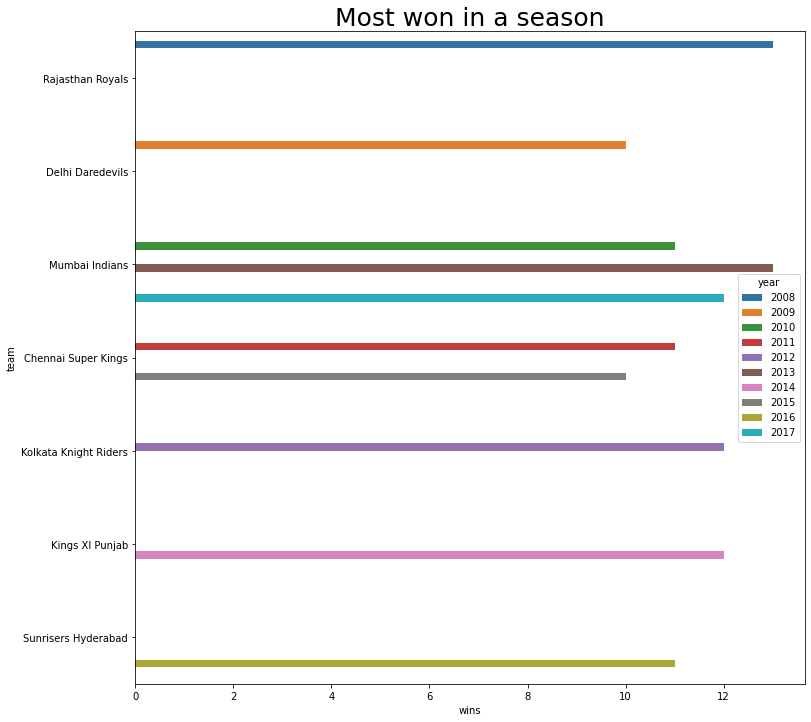

In [ ]:
plt.figure(figsize=(12,12))
plt.title('Most won in a season' , fontsize = 25)
sns.barplot(x = 'wins' , y = 'team' , hue='year', data=win_per_season)

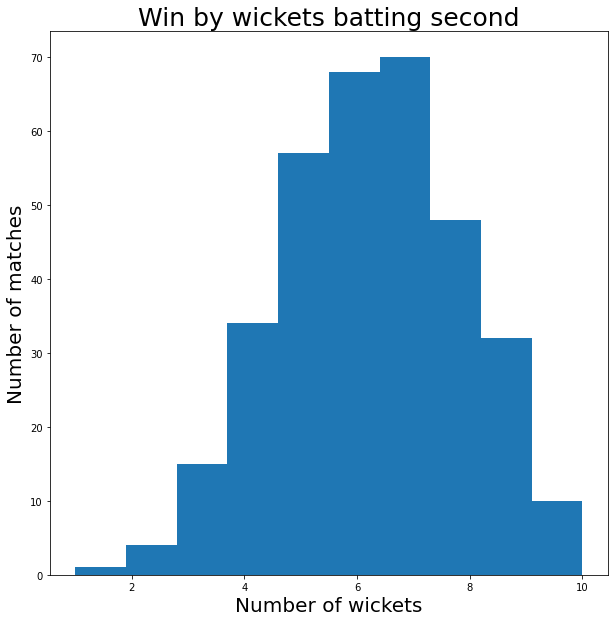

In [ ]:
#Win by wickets batting second – histogram
batting_second = ipl[ipl['win_by_wickets'] != 0]
fig, ax = plt.subplots(figsize=(10, 10))
ax.set_title('Win by wickets batting second', fontsize = 25)
ax.set_xlabel('Number of wickets' , fontsize = 20)
ax.set_ylabel('Number of matches' , fontsize = 20)
plt.hist(batting_second['win_by_wickets'])  ##histogram
plt.show()

In [ ]:
len(ipl)

636

In [ ]:
defend = ipl['win_by_runs'].value_counts()
defend.sort_values(ascending=True)

146      1
42       1
40       1
36       1
87       1
      ... 
9        9
10       9
23       9
7        9
0      349
Name: win_by_runs, Length: 86, dtype: int64

In [ ]:
#Of the 756 IPL matches played from 2008 to 2019, 419 matches were won chasing the target. Hence, more victories were registered by teams chasing a total(batting second) than defending the total
#When defending a total, the biggest victory was by 146 runs
score = 146
for index, row in ipl.iterrows():
    if(row['win_by_runs'] == score):
        print(row)  

id                               44
season                         2017
city                          Delhi
date                     06-05-2017
team1                Mumbai Indians
team2              Delhi Daredevils
toss_winner        Delhi Daredevils
toss_decision                 field
result                       normal
dl_applied                        0
winner               Mumbai Indians
win_by_runs                     146
win_by_wickets                    0
player_of_match         LMP Simmons
venue              Feroz Shah Kotla
umpire1                 Nitin Menon
umpire2                   CK Nandan
umpire3                         NaN
Name: 43, dtype: object


In [ ]:
#The greatest victory in IPL on defending a total is for Mumbai Indians when they defeated Delhi Daredevils by 146 runs on 06 May 2017 at Feroz Shah Kotla stadium, Delhi
chasing = ipl['win_by_wickets'].value_counts()
chasing

0     297
7      70
6      68
5      57
8      48
4      34
9      32
3      15
10     10
2       4
1       1
Name: win_by_wickets, dtype: int64

In [ ]:
#Of the 756 IPL matches played from 2008 to 2019, 350 matches were won defending the total.
#When chasing a target, the biggest victory was by 10 wickets(without losing any wickets). There were 11 such instances
for index, row in ipl.iterrows():
    if(row['win_by_wickets'] == 10):
        print(row)

id                                                      3
season                                               2017
city                                               Rajkot
date                                           07-04-2017
team1                                       Gujarat Lions
team2                               Kolkata Knight Riders
toss_winner                         Kolkata Knight Riders
toss_decision                                       field
result                                             normal
dl_applied                                              0
winner                              Kolkata Knight Riders
win_by_runs                                             0
win_by_wickets                                         10
player_of_match                                   CA Lynn
venue              Saurashtra Cricket Association Stadium
umpire1                                       Nitin Menon
umpire2                                         CK Nandan
umpire3       

In [ ]:
chasing_df = pd.DataFrame(columns=['victory_margin', 'instances'])

for items in chasing.iteritems():    
    temp_df7 = pd.DataFrame({
        'victory_margin': [items[0]],
        'instances': [items[1]]
    })
    chasing_df = chasing_df.append(temp_df7, ignore_index=True)
    
#to drop the first row as it represents victory margin of zero wickets(victory by defending a total)
chasingdf2 = chasing_df.drop([0]) 
chasingdf2

,victory_margin,instances
1,7,70
2,6,68
3,5,57
4,8,48
5,4,34
6,9,32
7,3,15
8,10,10
9,2,4
10,1,1


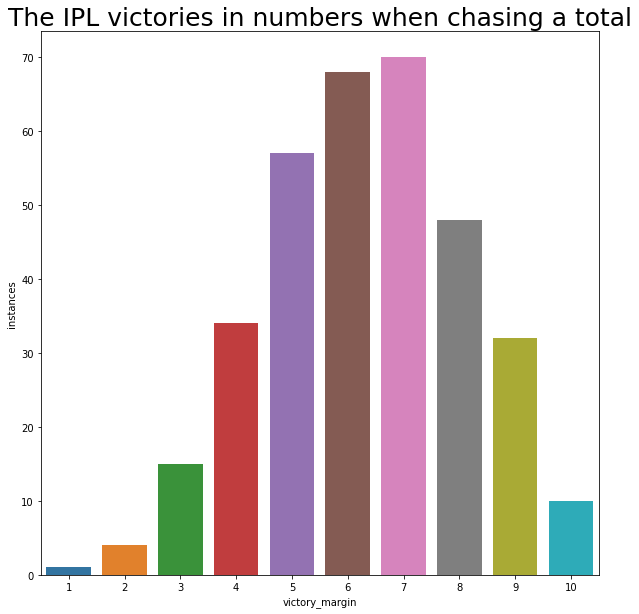

In [ ]:
#Biggest victories in IPL when chasing a total
plt.figure(figsize = (10 , 10))
plt.title('The IPL victories in numbers when chasing a total' , fontsize = 25)
sns.barplot(x='victory_margin', y='instances', data=chasingdf2);

In [ ]:
ump1 = ipl['umpire1'].value_counts()
ump2 = ipl['umpire2'].value_counts()
umpires_df = pd.concat([ump1, ump2], axis=1)
umpires_df

,umpire1,umpire2
HDPK Dharmasena,73.0,14.0
Asad Rauf,51.0,NaN
AK Chaudhary,43.0,15.0
Aleem Dar,38.0,NaN
BF Bowden,37.0,NaN
S Ravi,36.0,49.0
BR Doctrove,34.0,8.0
M Erasmus,32.0,22.0
RE Koertzen,20.0,21.0
S Asnani,19.0,11.0


In [ ]:
umpire_ser = umpires_df.sum(axis=1)

umpire_df = pd.DataFrame(columns=["umpire", "matches"])

for items in umpire_ser.iteritems():
    temp_df4 = pd.DataFrame({
        'umpire':[items[0]],
        'matches':[items[1]]
    })
    umpire_df= umpire_df.append(temp_df4, ignore_index=True) 
#on-field umpire with maximum number of ipl matches
umpire_df.sort_values('matches', ascending=False).head()

,umpire,matches
0,HDPK Dharmasena,87.0
5,S Ravi,85.0
2,AK Chaudhary,58.0
29,C Shamshuddin,56.0
43,SJA Taufel,55.0


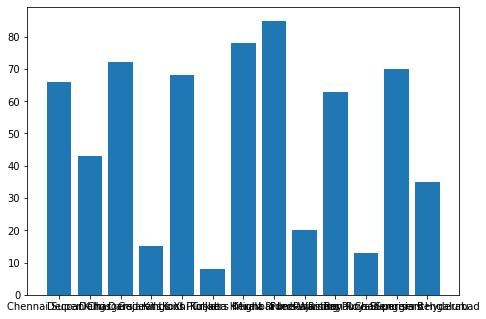

In [ ]:
fig = plt.figure()
# team won by toss
ipl['count'] = 1
toss_winner = ipl.groupby(['toss_winner'])['count'].sum()
ax = fig.add_axes([0,0,1,1])
langs = list(toss_winner.index)
students = list(toss_winner)
ax.bar(langs,students)
plt.show()

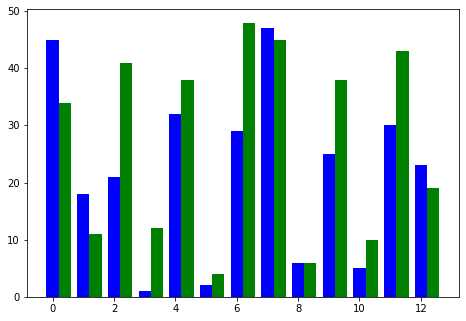

In [ ]:
ipl['batting_first'] = [row['toss_winner'] if row['toss_decision']=='bat' else row['team1'] for index,row in ipl.iterrows()]
ipl['batting_second'] = [row['toss_winner'] if row['toss_decision']=='field' else row['team2'] for index,row in ipl.iterrows()]

batting_first = ipl[(ipl['batting_first']==ipl['winner'])]

batting_second = ipl[(ipl['batting_second']==ipl['winner'])]

batting_first_winner = batting_first.groupby(['winner'])['count'].sum()

batting_second_winner = batting_second.groupby(['winner'])['count'].sum()

#print (batting_first_winner,batting_second_winner)
datas = [list(batting_first_winner),
list(batting_second_winner)]

X = np.arange(len(batting_first_winner))

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(X + 0.00, datas[0], color = 'b', width = 0.40)
ax.bar(X + 0.40, datas[1], color = 'g', width = 0.40)
plt.show()